In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import scipy.sparse as sp

# Préparation des données

Récupérez l'archive http://files.grouplens.org/datasets/movielens/ml-100k.zip, sauvegardez-la dans le répertoire /donnees de votre machine, et décompressez-la.

Le jeu de données contient 100,000 notes (entre 1 et 5) données par 943 utilisateurs sur 1682 films.

Nous utiliserons pour ce TP:

Le fichier u.data qui contient la liste des diférentes notes données par les différents utilisateurs aux différents films
Le fichier u.item qui fournit des informations sur les films concernés (titre, année de sortie, genre,...)

In [6]:
M = np.loadtxt('ml-100k/u.data', dtype='int32')
M

array([[      196,       242,         3, 881250949],
       [      186,       302,         3, 891717742],
       [       22,       377,         1, 878887116],
       ...,
       [      276,      1090,         1, 874795795],
       [       13,       225,         2, 882399156],
       [       12,       203,         3, 879959583]])

In [46]:
row = M[:,0] - 1
col = M[:,1] - 1
data = M[:,2]
X = sp.coo_matrix((data, (row , col))).toarray()
print(row)
print(col)
print(data)
print(X)

[195 185  21 ... 275  12  11]
[ 241  301  376 ... 1089  224  202]
[3 3 1 ... 1 2 3]
[[5 3 4 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [5 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 5 0 ... 0 0 0]]


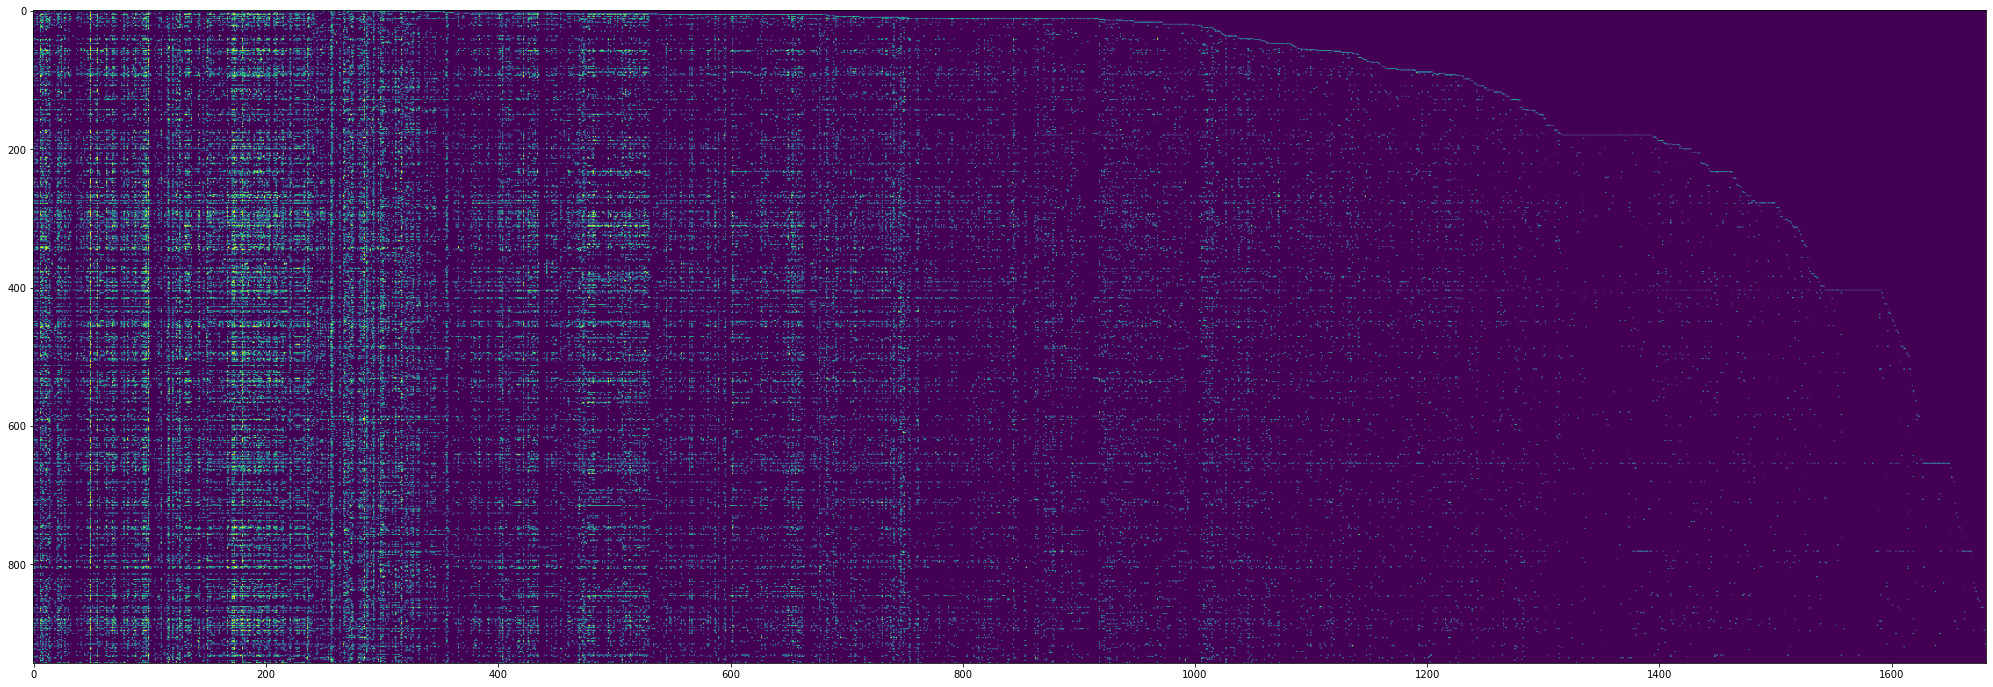

In [8]:
figure(figsize=(35,12)); imshow(X, aspect='auto')

# Soustraction de la moyenne

In [9]:
(m,n) = X.shape
X_new = np.zeros((m,n)) 
for i in range(m):
    indices = np.where(X[i,:]>0)
    X_new[i,indices] = X[i,indices] - mean(X[i,indices])

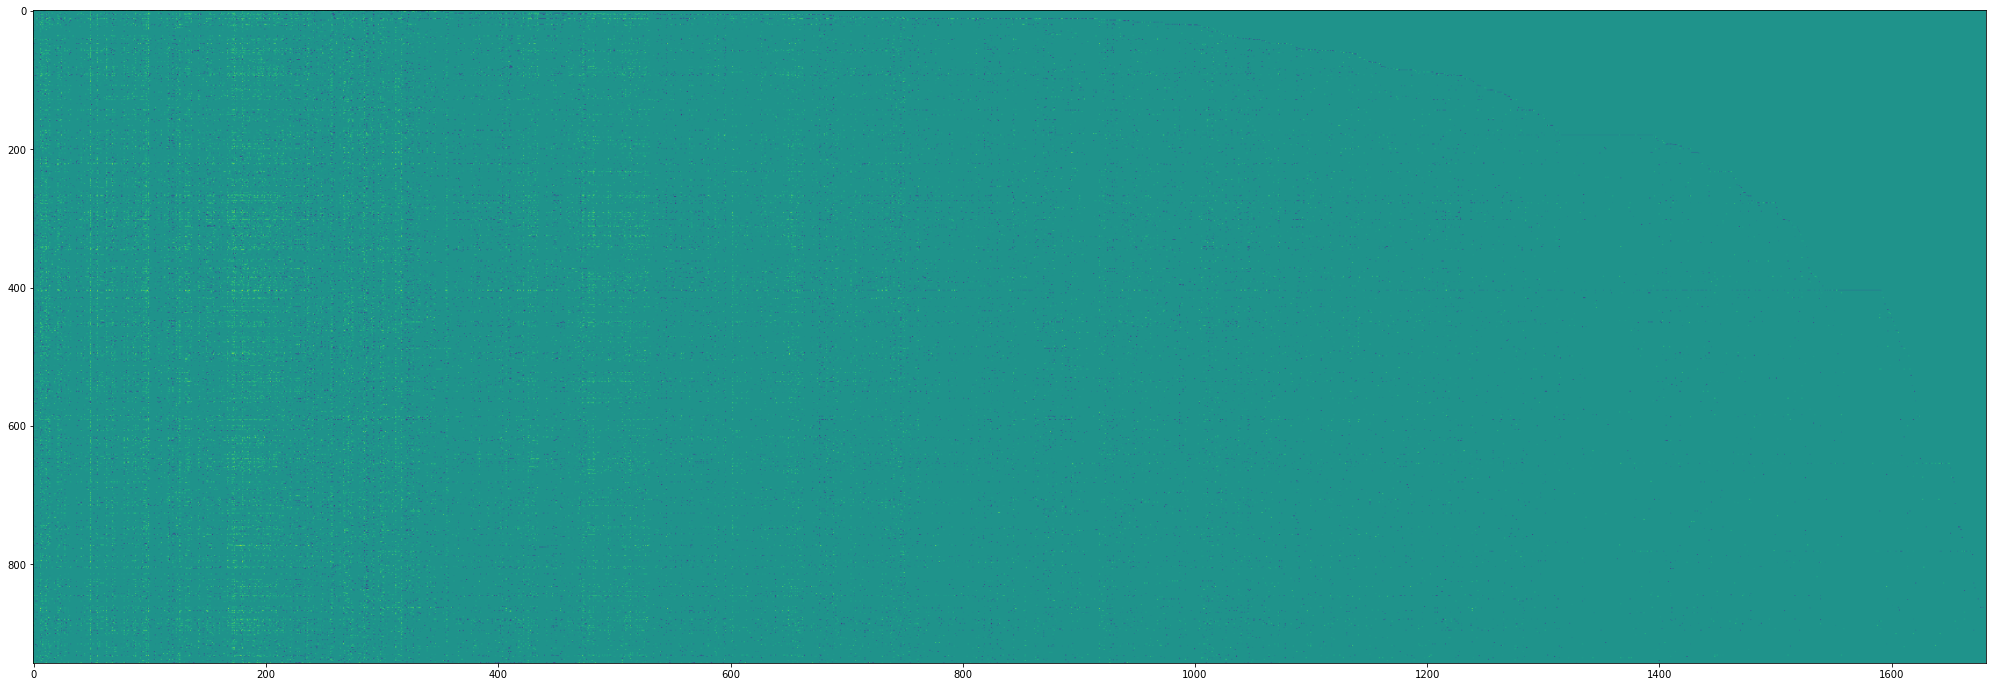

In [10]:
figure(figsize=(35,12)); imshow(X_new, aspect='auto')

# Informations sur les films

Pour lire les données contenues dans u.item, vous devez utiliser un csv.reader :

In [12]:
import csv

r = csv.reader(["unknown|Action|Adventure|Animation|Children's|Comedy|Crime|Documentary|Drama|Fantasy|Film-Noir|Horror|Musical|Mystery|Romance|Sci-Fi|Thriller|War|Western"], delimiter = '|')
for genre_header in r:
    print(genre_header)

['unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


In [13]:
item_data = []
f = open("ml-100k/u.item",'r', encoding = 'latin_1')
reader = csv.reader(f, delimiter='|')
for row in reader:
    item_data += [row]
    
titre = {}
genre = {}
for i in range(len(item_data)):
    #print item_data[i][0]
    titre[i] = item_data[i][1]
    genre[i] = {}
    for j in range(19):
        if int(item_data[i][5+j]) == 1:
            genre[i][genre_header[j]] = 1

In [72]:
for i in range(10):
    print(titre[i], genre[i])

print(len(titre), len(genre))

Toy Story (1995) {'Animation': 1, "Children's": 1, 'Comedy': 1}
GoldenEye (1995) {'Action': 1, 'Adventure': 1, 'Thriller': 1}
Four Rooms (1995) {'Thriller': 1}
Get Shorty (1995) {'Action': 1, 'Comedy': 1, 'Drama': 1}
Copycat (1995) {'Crime': 1, 'Drama': 1, 'Thriller': 1}
Shanghai Triad (Yao a yao yao dao waipo qiao) (1995) {'Drama': 1}
Twelve Monkeys (1995) {'Drama': 1, 'Sci-Fi': 1}
Babe (1995) {"Children's": 1, 'Comedy': 1, 'Drama': 1}
Dead Man Walking (1995) {'Drama': 1}
Richard III (1995) {'Drama': 1, 'War': 1}
1682 1682


# Analyse en Composantes Principales (ACP)

In [58]:
C = np.cov(X_new) #matrice de covariance
X_new.shape

(943, 1682)

In [29]:
print(C.shape, X_new.shape)

(943, 943) (943, 1682)


Calcul des valeurs propres et des vecteurs propres

In [27]:
[L,V_acp] = np.linalg.eig(C) #vecteurs propres V_acp
print(L.shape, V_acp.shape)

(943,) (943, 943)


Projection dans la nouvelle base

In [52]:
Y_acp = V_acp.T.dot(X_new) #nouvelle coordonnée
Y_acp.shape

(943, 1682)

Représentez les 100 premiers films de la base sur les deux ou trois premieres composantes en utilisant les codes couleurs suivants :

rouge pour action
bleu pour adventure
vert pour comedy
magenta pour drama
noir pour thriller
Conclusion?

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
item_data[0][4]

'http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)'

In [116]:
Action_x = []
Action_y = []
Adventure_x = []
Adventure_y = []
Comedy_x = []
Comedy_y = []
Drama_x = []
Drama_y = []
Triller_x = []
Triller_y = []


for i in range(100): #100 premiers films
    for x in item_data[i][5:]:
        if item_data[i][6] == "1": #6ème position indique si c'est un film d'action
            Action_x.append(Y_acp[0,i]) #deux première composantes
            Action_y.append(Y_acp[1,i])
        if item_data[i][7] == "1":
            Adventure_x.append(Y_acp[0,i])
            Adventure_y.append(Y_acp[1,i])
        if item_data[i][10] == "1":
            Comedy_x.append(Y_acp[0,i])
            Comedy_y.append(Y_acp[1,i])
        if item_data[i][13] == "1":
            Drama_x.append(Y_acp[0,i])
            Drama_y.append(Y_acp[1,i])
        if item_data[i][21] == "1":
            Triller_x.append(Y_acp[0,i])
            Triller_y.append(Y_acp[1,i])

   

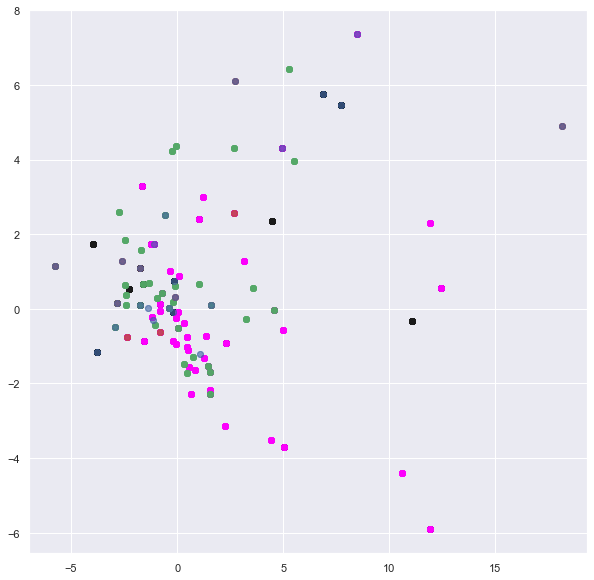

In [117]:
fig, ax = plt.subplots(figsize=(10, 10))

x = Action_x
y = Action_y
x_1 = Adventure_x
y_1 = Adventure_y
x_2 = Comedy_x
y_2 = Comedy_y
x_3 = Drama_x
y_3 = Drama_y
x_4 = Triller_x
y_4 = Triller_y

plt.scatter(x_4, y_4, c="k", alpha = 1)
plt.scatter(x_3, y_3, c="magenta", alpha = 0.3)
plt.scatter(x_2, y_2, c="g", alpha = 0.2)
plt.scatter(x_1, y_1, c="r", alpha = 0.1)
plt.scatter(x, y, c="b", alpha = 0.05)





plt.show()

# Reconstruction inverse

On souhaite représenter les films de la base à l'aide d'un nombre réduit de composantes.

Combien de composantes sont nécessaires pour traduire 95% de la variance des données initiales?
Soit K le nombre de composantes déterminé précédemment. Reconstruisez la matrice des notes initiales a partir de ces K composantes. Quelle est l'erreur moyenne par rapport à la matrice de depart ?

In [128]:
variance_tot = 0
for x in L :
    variance_tot = variance_tot + x
    
print("la variance est de :",variance_tot)

la variance est de : 63.21076474947666


In [129]:
sum = L[0]
i = 0
while sum < (variance_tot * 0.95) :
    sum = sum + L[i]
    i = i + 1

print(sum, i)
    

60.090648699994844 303


In [131]:
V_acp_K = V_acp[:303,:]
V_acp_K.shape

(303, 943)

In [139]:
X_reconstitue = Y_acp.T.dot(V_acp_K.T)
np.linalg.norm(X_reconstitue.T-X_new[:303,:])

4.3110139412404145e-11

On obtient une petite erreur, la reconstruction semble avoir marche

# Décomposition en Valeurs Singulières (SVD)¶

In [141]:
U_svd, s, V_svd = np.linalg.svd(X_new)

In [142]:
(m,n) = X_new.shape
S_svd = np.zeros((m,n))
S_svd[:m, :m] = np.diag(s)

Reconstruction

In [144]:
X_rec = U_svd.dot(S_svd.dot(V_svd))
P = U_svd.dot(np.sqrt(S_svd))[:m,:m]
Q = np.sqrt(S_svd).dot(V_svd)

In [158]:
# imshow(dot(P,Q))
dot(P,Q).shape

(943, 1682)

Affichez l'utilisateur 300 selon ses deux premières composantes (matrice P).
Affichez également chacun des films notés par cet utilisateurs selon leurs deux premières composantes (matrice Q).
Donnez la moyenne des notes de cet utilisateur sur chaque quadrant.
Conclusion?

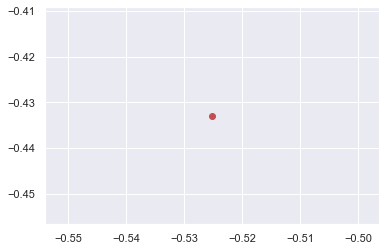

In [156]:
plot(P[300,0], P[300,1], c ='r', marker = 'o') #ligne 300 est l'utilisateur 300

plt.show()

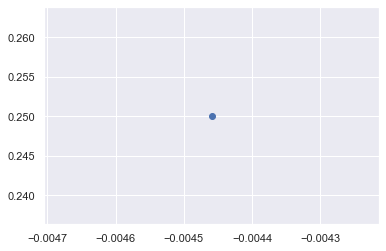

In [157]:
plot(Q[300,0], Q[300,1], c ='b', marker = 'o') #les deux premiers films de l'utilisateur 300
plt.show()

In [159]:
average(dot(P,Q)[300,:]) #moyenne des notes de l'utilisateur 300

-1.6633543531839443e-17

Déterminez les cinq plus proches voisins de l'utilisateur 300 selon les valeurs de la matrice P. Les notes de cet utilisateur sont-elles prédictibles à partir des notes données par les voisins?